In [1]:
import cv2
import glob
import os
from keras.models import load_model
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras.models import load_model
from tensorflow.python.keras.models import model_from_json


In [4]:
# !pip install mediapipe

In [2]:
t = sorted(glob.glob(os.path.join('Test2_self_dataset','*.jpg')))

total_imgs=[]
for item in t:
    
    t1=item.split('\\')
    print(item)
    #if len(t1) == 1: 
    total_imgs.append(t1[-1])
 

Test2_self_dataset\0001.jpg
Test2_self_dataset\0002.jpg
Test2_self_dataset\0003.jpg
Test2_self_dataset\0004.jpg
Test2_self_dataset\0005.jpg
Test2_self_dataset\0006.jpg
Test2_self_dataset\0007.jpg
Test2_self_dataset\0008.jpg
Test2_self_dataset\0009.jpg
Test2_self_dataset\0010.jpg
Test2_self_dataset\0011.jpg
Test2_self_dataset\0012.jpg
Test2_self_dataset\0013.jpg
Test2_self_dataset\0014.jpg
Test2_self_dataset\0015.jpg
Test2_self_dataset\0016.jpg
Test2_self_dataset\0017.jpg
Test2_self_dataset\0018.jpg
Test2_self_dataset\0019.jpg
Test2_self_dataset\0020.jpg
Test2_self_dataset\0021.jpg
Test2_self_dataset\0022.jpg
Test2_self_dataset\0023.jpg
Test2_self_dataset\0024.jpg
Test2_self_dataset\0025.jpg
Test2_self_dataset\0026.jpg
Test2_self_dataset\0027.jpg
Test2_self_dataset\0028.jpg
Test2_self_dataset\0029.jpg
Test2_self_dataset\0030.jpg
Test2_self_dataset\0031.jpg
Test2_self_dataset\0032.jpg
Test2_self_dataset\0033.jpg
Test2_self_dataset\0034.jpg
Test2_self_dataset\0035.jpg
Test2_self_dataset\0

# Haarcascade Face Detection

Cropped_Faces\0001.jpg
Cropped_Faces\0007.jpg
Cropped_Faces\0009.jpg
Cropped_Faces\0017.jpg
Cropped_Faces\0018.jpg
Cropped_Faces\0022.jpg
Cropped_Faces\0023.jpg
Cropped_Faces\0027.jpg
Cropped_Faces\0032.jpg
Cropped_Faces\0033.jpg
Cropped_Faces\0034.jpg
Cropped_Faces\0034.jpg
Cropped_Faces\0035.jpg
Cropped_Faces\0037.jpg
Cropped_Faces\0038.jpg
Cropped_Faces\0039.jpg
Cropped_Faces\0040.jpg
Cropped_Faces\0041.jpg
Cropped_Faces\0042.jpg
Cropped_Faces\0044.jpg
Cropped_Faces\0045.jpg
Cropped_Faces\0046.jpg
Cropped_Faces\0047.jpg
Cropped_Faces\0048.jpg
Cropped_Faces\0050.jpg
Cropped_Faces\0053.jpg
Cropped_Faces\0054.jpg
Cropped_Faces\0067.jpg
Cropped_Faces\0068.jpg
Cropped_Faces\0068.jpg
Cropped_Faces\0069.jpg
Cropped_Faces\0070.jpg
Cropped_Faces\0071.jpg
Cropped_Faces\0074.jpg
Cropped_Faces\0075.jpg
Cropped_Faces\0076.jpg
Cropped_Faces\0076.jpg
Cropped_Faces\0077.jpg
Cropped_Faces\0078.jpg
Cropped_Faces\0078.jpg
Cropped_Faces\0079.jpg
Cropped_Faces\0080.jpg
Cropped_Faces\0081.jpg
Cropped_Fac

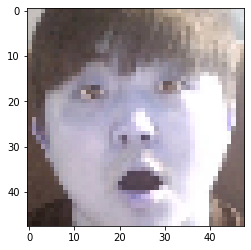

In [3]:
################# Not Effective on animated Images #########################
img_path='Test2_self_dataset'
count = 0
f=0
for i in total_imgs:
    img_name = i.split('/')[-1]
    img_name=img_path+'\\'+ i
    img = cv2.imread(img_name)
    plt.imshow(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray,'gray')
    face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml');
    faces = face_cascade.detectMultiScale(gray, 1.05, 5)
    if len(faces) >0: f+=1
    for (x,y,w,h) in faces:
#         cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
        crop_img = img[y:y+h, x:x+w]
        crop_img = cv2.resize(crop_img, (48, 48),  interpolation=cv2.INTER_LINEAR)
        plt.imshow(crop_img)
        destination=os.path.join('Cropped_Faces',i)
        print(destination)
        cv2.imwrite (destination,crop_img)
    count+=1
print(f)


## Reading Cropped faces  to predict Emotions

In [64]:
path='Cropped_Faces'
face_dir = sorted(glob.glob(os.path.join(path,'*.jpg')))
len(face_dir)
face_dir

['Cropped_Faces\\0001.jpg',
 'Cropped_Faces\\0003.jpg',
 'Cropped_Faces\\0004.jpg',
 'Cropped_Faces\\0005.jpg',
 'Cropped_Faces\\0006.jpg',
 'Cropped_Faces\\0007.jpg',
 'Cropped_Faces\\0008.jpg',
 'Cropped_Faces\\0009.jpg',
 'Cropped_Faces\\0010.jpg',
 'Cropped_Faces\\0011.jpg',
 'Cropped_Faces\\0012.jpg',
 'Cropped_Faces\\0013.jpg',
 'Cropped_Faces\\0014.jpg',
 'Cropped_Faces\\0015.jpg',
 'Cropped_Faces\\0016.jpg',
 'Cropped_Faces\\0017.jpg',
 'Cropped_Faces\\0018.jpg',
 'Cropped_Faces\\0019.jpg',
 'Cropped_Faces\\0020.jpg',
 'Cropped_Faces\\0021.jpg',
 'Cropped_Faces\\0022.jpg',
 'Cropped_Faces\\0026.jpg',
 'Cropped_Faces\\0027.jpg',
 'Cropped_Faces\\0029.jpg',
 'Cropped_Faces\\0030.jpg',
 'Cropped_Faces\\0031.jpg',
 'Cropped_Faces\\0032.jpg',
 'Cropped_Faces\\0033.jpg',
 'Cropped_Faces\\0034.jpg',
 'Cropped_Faces\\0035.jpg',
 'Cropped_Faces\\0036.jpg',
 'Cropped_Faces\\0037.jpg',
 'Cropped_Faces\\0038.jpg',
 'Cropped_Faces\\0039.jpg',
 'Cropped_Faces\\0040.jpg',
 'Cropped_Faces\\004